<a href="https://colab.research.google.com/github/willakuffo/ML_finalproject/blob/main/customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset from git repo and unzip


In [1]:
import os
if not os.path.exists('customer.zip'):
  !wget https://github.com/willakuffo/ML_finalproject/raw/main/customer.zip
  !unzip customer.zip
else:
  print('data alredy in dir')

--2021-04-15 18:27:47--  https://github.com/willakuffo/ML_finalproject/raw/main/customer.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/willakuffo/ML_finalproject/main/customer.zip [following]
--2021-04-15 18:27:47--  https://raw.githubusercontent.com/willakuffo/ML_finalproject/main/customer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101021 (99K) [application/zip]
Saving to: ‘customer.zip’

customer.zip        100%[===================>]  98.65K  --.-KB/s    in 0.003s  

2021-04-15 18:27:47 (38.2 MB/s) - ‘customer.zip’ saved [101021/101021]

Archive:  customer.zip
  inflating: test.

Load dataset

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Data head and tail

In [3]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


Some EDA

In [4]:
#concatenate train and test data for EDA
df_tt = pd.concat([train,test],axis = 0)
df_tt

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


check for null values

In [ ]:
df_tt['Segmentation'].isnull().value_counts()

False    8068
True     2627
Name: Segmentation, dtype: int64

In [ ]:
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [ ]:
#drop all rows with at least a nul value
df_tt.dropna(axis = 0,how = 'any',inplace = True)


In [ ]:
df_tt.reset_index(inplace = True)


In [ ]:
df_tt.drop(columns = ['index'],inplace = True)
df_tt

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
6660,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
6661,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
6662,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
6663,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
df_tt.describe()

,ID,Age,Work_Experience,Family_Size
count,6665.00000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110
std,2566.43174,16.524054,3.405365,1.524743
min,458982.00000,18.000000,0.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000
75%,465741.00000,53.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000


In [ ]:
df_tt['Gender'].dtype

dtype('O')

Distibution and input relationships


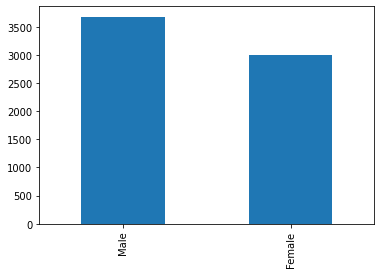

In [ ]:
df_tt['Gender'].value_counts().plot(kind = 'bar')

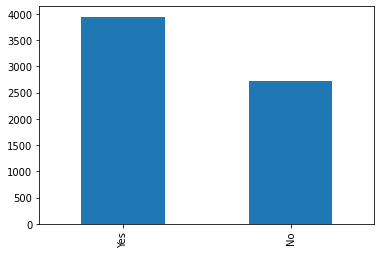

In [ ]:
df_tt['Ever_Married'].value_counts().plot(kind = 'bar')

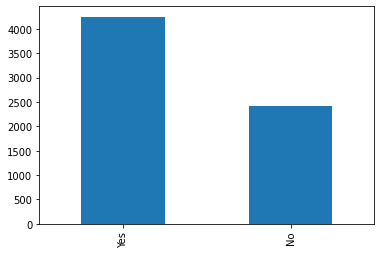

In [ ]:
df_tt['Graduated'].value_counts().plot(kind = 'bar')

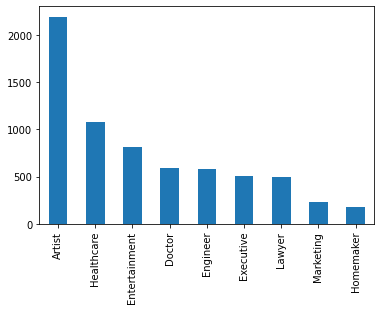

In [ ]:
df_tt['Profession'].value_counts().plot(kind = 'bar')

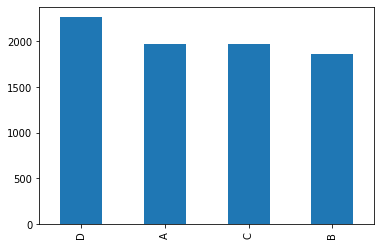

In [ ]:
df_tt['Segmentation'].value_counts().plot(kind = 'bar')

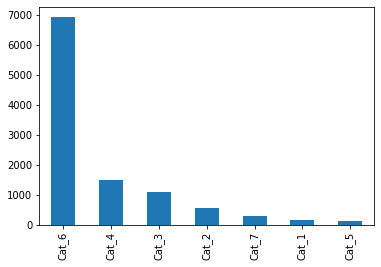

In [ ]:
df_tt['Var_1'].value_counts().plot(kind = 'bar')

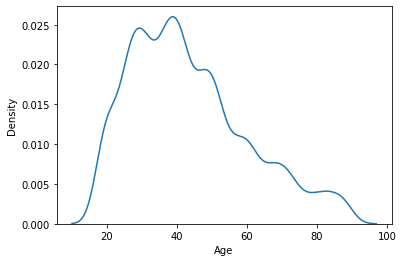

In [ ]:
import seaborn as sns
sns.kdeplot(df_tt['Age'],label = 'age')

In [ ]:
0